In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#Loading the data

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

#Understanding the data

In [4]:
df = pd.concat([X,y], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


#Handeling missing data

In [8]:
for col in df:
  print("Missing values: ", df[col].isnull().sum())

Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  4
Missing values:  2
Missing values:  0


##Classifying columns based on numerical or categorical data

In [9]:
def classify_cols(df , cat_thresh = 5, card_thresh  = 20 ):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique()<cat_thresh]
  cat_but_card_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique()>card_thresh]
  cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat_cols]
  return cat_cols, num_cols, cat_but_card_cols,num_but_cat_cols

cat_cols, num_cols, cat_but_card_cols, num_but_cat_cols = classify_cols(df)
print(f"cat_cols: {(cat_cols)}")
print(f"num_cols: {(num_cols)}")
print(f"cat_but_car: {(cat_but_card_cols)}")
print(f"num_but_cat_cols: {(num_but_cat_cols)}")

cat_cols: []
num_cols: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num']
cat_but_car: []
num_but_cat_cols: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


##Handeling missing data in num cols by replacing with mean

In [10]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy = "mean")
df[num_cols] = imputer_num.fit_transform(df[num_cols])

##Handeling missing data in num_but_cat_cols by replacing with most frequent value

In [11]:
from sklearn.impute import SimpleImputer
imputer_num_cat = SimpleImputer(strategy = 'most_frequent')
df[num_but_cat_cols] = imputer_num_cat.fit_transform(df[num_but_cat_cols])


##checking if it worked

In [12]:
for col in df:
  print("Missing values: ", df[col].isnull().sum())

Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0
Missing values:  0


#correlation matrix of df

[ 0.22285342  0.22446851  0.40707542  0.15775408  0.07090876  0.05918609
  0.18369635 -0.41504046  0.3970573   0.50409197  0.3779566   0.52096809
  0.50715467  1.        ]


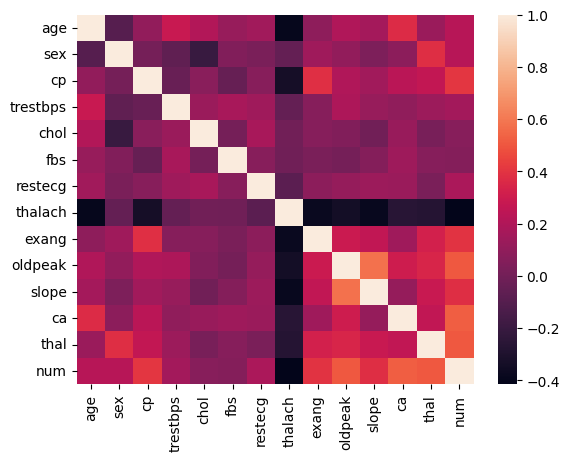

In [13]:
df_corr = df.corr()
sns.heatmap(df_corr)
print(df_corr["num"].values)

#Removing columns with less than 1% correlation

In [14]:
corr_coef_with_target_value = df_corr["num"].values

indexes_with_lessthan_1_corr = []

for index, value in enumerate(corr_coef_with_target_value):
    if abs(value) < 0.1:
        indexes_with_lessthan_1_corr.append(index)

df.drop(df.columns[indexes_with_lessthan_1_corr], axis=1,inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   restecg   303 non-null    float64
 5   thalach   303 non-null    float64
 6   exang     303 non-null    float64
 7   oldpeak   303 non-null    float64
 8   slope     303 non-null    float64
 9   ca        303 non-null    float64
 10  thal      303 non-null    float64
 11  num       303 non-null    float64
dtypes: float64(12)
memory usage: 28.5 KB


#Splitting data into training and test set

In [15]:
df_X = df.drop(columns = ['num'])
y = df["num"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.25, random_state = 0)

In [22]:
X_test.shape

(76, 11)

#Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#building the auto sklearn model

In [24]:
!pip install scikit-learn==0.24.2
!pip install auto-sklearn --find-links=https://download.lfd.uci.edu/pythonlibs/auto-sklearn/

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in links: https://download.lfd.uci.edu/pythonlibs/auto-sklearn/
  Using cached auto-sklearn-0.15.0.tar.gz (6.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting

In [25]:
import autosklearn.classification

automl = autosklearn.classification.AutoSklearnClassifier(
time_left_for_this_task = 60*60, per_run_time_limit=60, tmp_folder="/tmp/autosklearn_classification_example_tmp",)

automl.fit(X_train, y_train)

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:
print(automl.leaderboard())

In [ ]:
automl.score(X_train, y_train)

In [ ]:
automl.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred= automl.predict(X_test)
conf_matrix = confusion_matrix(y_pred, y_test)
m1_acc_score = accuracy_score(y_test, y_pred)
print(m1_acc_score)
sns.heatmap(conf_matrix, annot=True)